# Simple MNIST multiclass classification (using CNN)

## Imports

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

from neuralnetlib.activations import ReLU
from neuralnetlib.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Activation
from neuralnetlib.models import Model
from neuralnetlib.preprocessing import one_hot_encode
from neuralnetlib.metrics import accuracy_score, f1_score, recall_score
from neuralnetlib.utils import train_test_split

## 1. Loading a dataset (in this case, MNIST)

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.2, random_state=42)

## 2. Preprocessing

In [38]:
x_train = x_train.reshape(-1, 1, 28, 28) / 255.0  # Normalization and reshaping of the images for CNN
x_test = x_test.reshape(-1, 1, 28, 28) / 255.0  # Normalization and reshaping of the images for CNN
x_val = x_val.reshape(-1, 1, 28, 28) / 255.0  # Normalization and reshaping of the images for CNN
y_train = one_hot_encode(y_train, num_classes=10)  # One-hot encoding of the labels
y_test = one_hot_encode(y_test, num_classes=10)  # One-hot encoding of the labels
y_val = one_hot_encode(y_val, num_classes=10)  # One-hot encoding of the labels

## 3. Model definition

In [31]:
model = Model()
model.add(Input(input_shape=(1, 28, 28)))
model.add(Conv2D(filters=8, kernel_size=(3, 3), random_state=42))
model.add(Activation(ReLU()))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=16, kernel_size=(3, 3), random_state=42))
model.add(Activation(ReLU()))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, random_state=42))
model.add(Activation(ReLU()))
model.add(Dense(10, random_state=42, activation="softmax"))  # Yeah, you can also use strings for the activation functions, or directly the class

## 4. Model compilation

In [32]:
model.compile(loss_function="cce", optimizer="adam")  # You can also use strings for the loss function and the optimizer

model.summary()

Model
-------------------------------------------------
Layer 1: Input(input_shape=(1, 28, 28))
Layer 2: Conv2D(num_filters=8, kernel_size=(3, 3), stride=(1, 1), padding=valid)
Layer 3: Activation(ReLU)
Layer 4: MaxPooling2D(pool_size=(2, 2), stride=(2, 2), padding=valid)
Layer 5: Conv2D(num_filters=16, kernel_size=(3, 3), stride=(1, 1), padding=valid)
Layer 6: Activation(ReLU)
Layer 7: MaxPooling2D(pool_size=(2, 2), stride=(2, 2), padding=valid)
Layer 8: Flatten
Layer 9: Dense(units=32)
Layer 10: Activation(ReLU)
Layer 11: Dense(units=10)
Layer 12: Activation(Softmax)
-------------------------------------------------
Loss function: CategoricalCrossentropy
Optimizer: Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, clip_norm=None, clip_value=None)
-------------------------------------------------


## 5. Model training

In [33]:
model.fit(x_train, y_train, epochs=10, batch_size=64, metrics=[
            "accuracy"], random_state=42, validation_data=(x_test, y_test))

[==============================] 100% Epoch 1/10 - loss: 0.3072 - accuracy: 0.9037 - 36.18s - val_accuracy: 0.9709
[==============================] 100% Epoch 2/10 - loss: 0.1016 - accuracy: 0.9692 - 39.63s - val_accuracy: 0.9798
[==============================] 100% Epoch 3/10 - loss: 0.0802 - accuracy: 0.9765 - 37.82s - val_accuracy: 0.9822
[==============================] 100% Epoch 4/10 - loss: 0.0691 - accuracy: 0.9798 - 36.55s - val_accuracy: 0.9835
[==============================] 100% Epoch 5/10 - loss: 0.0617 - accuracy: 0.9825 - 36.58s - val_accuracy: 0.9844
[==============================] 100% Epoch 6/10 - loss: 0.0560 - accuracy: 0.9847 - 37.05s - val_accuracy: 0.9842
[==============================] 100% Epoch 7/10 - loss: 0.0520 - accuracy: 0.9860 - 37.88s - val_accuracy: 0.9849
[==============================] 100% Epoch 8/10 - loss: 0.0492 - accuracy: 0.9868 - 37.03s - val_accuracy: 0.9842
[==============================] 100% Epoch 9/10 - loss: 0.0464 - accuracy: 0.98

## 6. Model evaluation

In [7]:
loss, _ = model.evaluate(x_val, y_val)
print(f'Test loss: {loss}')

Test loss: 0.12769228934974092


## 7. Model prediction

In [39]:
y_pred = model.predict(x_val)

## 8. Printing some metrics

In [40]:
print("accuracy:", accuracy_score(y_pred, y_val))
print("f1_score:", f1_score(y_pred, y_val))
print("recall_score", recall_score(y_pred, y_val))

accuracy: 0.9825
f1_score: 0.9820683461687337
recall_score 0.9820652084404549


## 9. Plot the first 10 test images, their predicted labels, and the true labels.

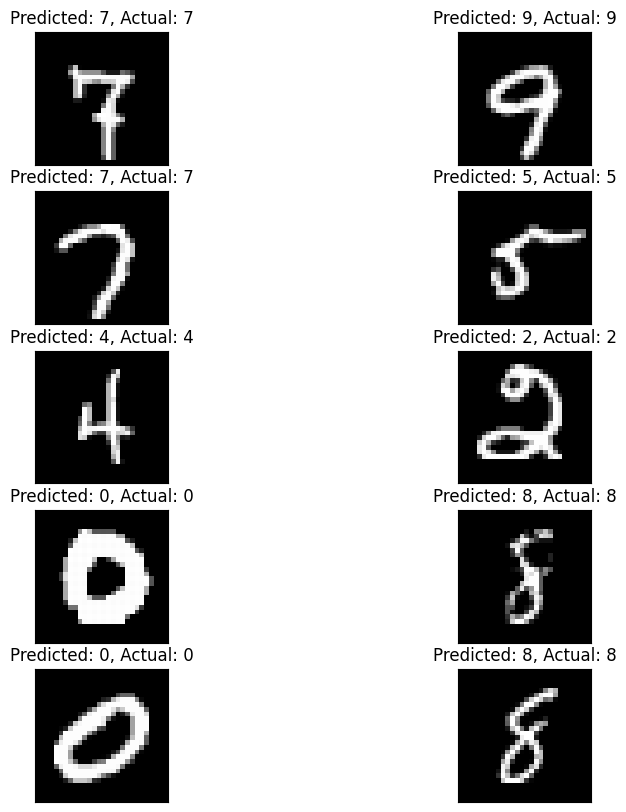

In [43]:
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    ax = fig.add_subplot(5, 2, i + 1, xticks=[], yticks=[])
    ax.imshow(x_val[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Predicted: {np.argmax(y_pred[i])}, Actual: {np.argmax(y_val[i])}")
plt.show()

## 10. Save the model

In [11]:
model.save("my_mnist_model.npz")